# Regressão Linear Múltipla - ERRATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_columns', None)

pd.options.display.max_columns = 30 # alterando a quantidade de colunas NA VISUALIZAÇÃO

#### Exemplo 2

Para o exemplo de Regressão Linear Múltipla, iremos utilizar o dataset *Car_Prices.csv*, onde o objetivo é estimar o preço dos carros a partir de suas características.


Problem Description
A Chinese automobile company Teclov_chinese aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

• Which variables are significant in predicting the price of a car

• How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

Alternativa de solução (incluindo exploração dos dados):

https://www.kaggle.com/dronax/car-prices-dataset/notebook

In [2]:
cars = pd.read_csv('https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo4/Datasets/CarPrice_Assignment.csv')

cars.drop(columns=['drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'],
          inplace=True) #excluindo pq eu quero

In [3]:
# label encoder
cars.loc[cars['cylindernumber']=='four', 'ncilindros'] = 4
cars.loc[cars['cylindernumber']=='six', 'ncilindros'] = 6
cars.loc[cars['cylindernumber']=='five', 'ncilindros'] = 5
cars.loc[cars['cylindernumber']=='eight', 'ncilindros'] = 8
cars.loc[cars['cylindernumber']=='two', 'ncilindros'] = 2
cars.loc[cars['cylindernumber']=='three', 'ncilindros'] = 3
cars.loc[cars['cylindernumber']=='twelve', 'ncilindros'] = 12

In [4]:
cars_with_dummies = pd.get_dummies(cars, prefix_sep='_', columns=['fueltype', 
                                                                  'aspiration', 
                                                                  'doornumber', 
                                                                  'carbody'])

In [6]:
cars_with_dummies

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,ncilindros,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0,4.0,0,1,1,0,0,1,1,0,0,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0,4.0,0,1,1,0,0,1,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0,6.0,0,1,1,0,0,1,0,0,1,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0,4.0,0,1,1,0,1,0,0,0,0,1,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0,5.0,0,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),109.1,188.8,68.9,55.5,2952,four,141,3.78,3.15,9.5,114,5400,23,28,16845.0,4.0,0,1,1,0,1,0,0,0,0,1,0
201,202,-1,volvo 144ea,109.1,188.8,68.8,55.5,3049,four,141,3.78,3.15,8.7,160,5300,19,25,19045.0,4.0,0,1,0,1,1,0,0,0,0,1,0
202,203,-1,volvo 244dl,109.1,188.8,68.9,55.5,3012,six,173,3.58,2.87,8.8,134,5500,18,23,21485.0,6.0,0,1,1,0,1,0,0,0,0,1,0
203,204,-1,volvo 246,109.1,188.8,68.9,55.5,3217,six,145,3.01,3.40,23.0,106,4800,26,27,22470.0,6.0,1,0,0,1,1,0,0,0,0,1,0


In [11]:
# Quando calculamos o erro em cima do peakrpm
y_pred1 =  5059
y_test1 = 4800 # real

#erro
y_pred1 - y_test1

259

In [12]:
(y_pred1 - y_test1)/y_test1*100

5.395833333333333

In [13]:
# Quando calculamos o erro em cima do horsepower
y_pred1 = 186
y_test1 = 154 # real

#erro
y_pred1 - y_test1

32

In [14]:
(y_pred1 - y_test1)/y_test1*100

20.77922077922078

O erro do peakrpm é maior que o erro do horsepower em valor absoluto. Quando comparamos com a ordem de grandeza, o erro no horsepower é maior.

Como contornar esse problema e comparar as variáveis diretamente?

- normalizar/padronizar os dados (scaling)
    - padronização
    - normalização
    - min max
    
Vamos deixar as variáveis na mesma escala

https://scikit-learn.org/stable/modules/preprocessing.html

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cars_with_dummies.drop(['CarName', 'price','cylindernumber'], axis = 1))

StandardScaler()

In [18]:
X = scaler.transform(cars_with_dummies.drop(['CarName', 'price','cylindernumber'], axis = 1))

y = cars_with_dummies['price'] # target, classe, dependente

In [19]:
# dados originais
cars_with_dummies.drop(['CarName', 'price','cylindernumber'], axis = 1)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,ncilindros,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,4.0,0,1,1,0,0,1,1,0,0,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,4.0,0,1,1,0,0,1,1,0,0,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,6.0,0,1,1,0,0,1,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,4.0,0,1,1,0,1,0,0,0,0,1,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,5.0,0,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,4.0,0,1,1,0,1,0,0,0,0,1,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,4.0,0,1,0,1,1,0,0,0,0,1,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,6.0,0,1,1,0,1,0,0,0,0,1,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,6.0,1,0,0,1,1,0,0,0,0,1,0


In [20]:
# dados padronizados
scaler.transform(cars_with_dummies.drop(['CarName', 'price','cylindernumber'], axis = 1))

array([[-1.72362229,  1.74347043, -1.6907718 , ..., -0.7200823 ,
        -0.93847426, -0.372678  ],
       [-1.70672403,  1.74347043, -1.6907718 , ..., -0.7200823 ,
        -0.93847426, -0.372678  ],
       [-1.68982577,  0.133509  , -0.70859588, ...,  1.38873015,
        -0.93847426, -0.372678  ],
       ...,
       [ 1.68982577, -1.47645244,  1.72187336, ..., -0.7200823 ,
         1.06555932, -0.372678  ],
       [ 1.70672403, -1.47645244,  1.72187336, ..., -0.7200823 ,
         1.06555932, -0.372678  ],
       [ 1.72362229, -1.47645244,  1.72187336, ..., -0.7200823 ,
         1.06555932, -0.372678  ]])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [22]:
from sklearn.linear_model import LinearRegression

# Instancia o modelo
model = LinearRegression()  #modelo, model, lr, linreg

# Fit(ajuste) dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Para os dados novos, vamos definir a predição para a base de teste
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R2:', R2)

R2: 0.7584522836048249


Não preciso padronizar os dados para todos os modelos, incluindo Regressão Linear. 
Porém, quando vamos fazer o *feature importante*, precisamos de dados na mesma escala, por isso padronizar

In [26]:
coefs = model.coef_

list_columns = cars_with_dummies.drop(['CarName', 'price','cylindernumber'], axis=1).columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary = {'Features': list_feature,
              'Scores': list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)
#df_features.head(10)
df_features

,Features,Scores
0,enginesize,3616.005994
1,compressionratio,3135.937039
2,curbweight,1980.695253
3,carwidth,1707.646563
4,carbody_hardtop,1468.130683
5,fueltype_gas,1349.431243
6,horsepower,1157.825254
7,wheelbase,829.275398
8,peakrpm,590.762498
9,carbody_convertible,536.250098


<AxesSubplot:xlabel='Scores', ylabel='Features'>

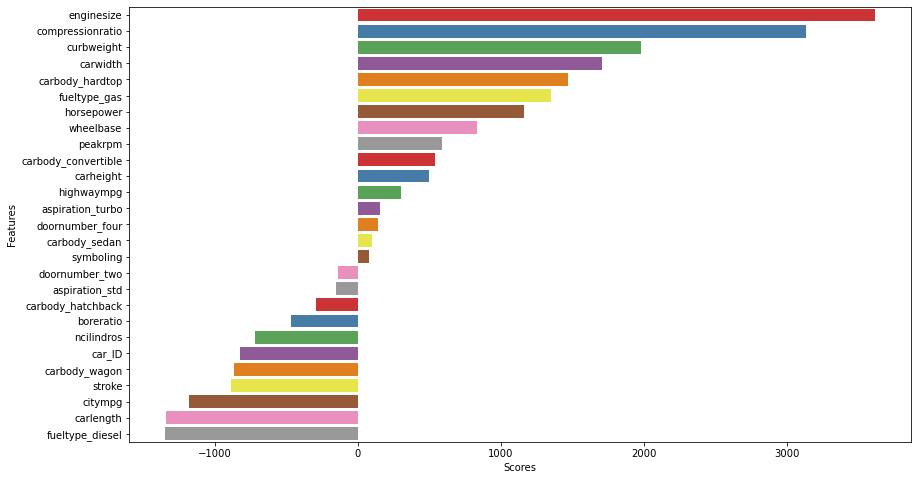

In [27]:
plt.figure(figsize=(14,8))
sns.barplot(x='Scores', y='Features', data=df_features, palette='Set1')

Então, a variável mais importante é o tamanho do motor (enginesize).

Se eu quiser diminuir a quantidade de variáveis, podemos eliminar por exemplo as variáveis: symboling, doornumber two

O modelo de regressão linear é MUITO sensível a outliers, por isso se queremos melhor a acurária, devemos tratar os dados antes

Padronizar não reflete em melhora no R2, ajuda na análise de variáveis importantes